In [82]:
#importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###1&2 Downloading & Loading Dataset

In [83]:
##Loading Dataset

df=pd.read_csv("/content/penguins_size.csv")
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


#3. visualizations

###3.1 Univariate Analysis

<ipython-input-84-906e1b1f60a0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["culmen_length_mm"])


<Axes: xlabel='culmen_length_mm', ylabel='Density'>

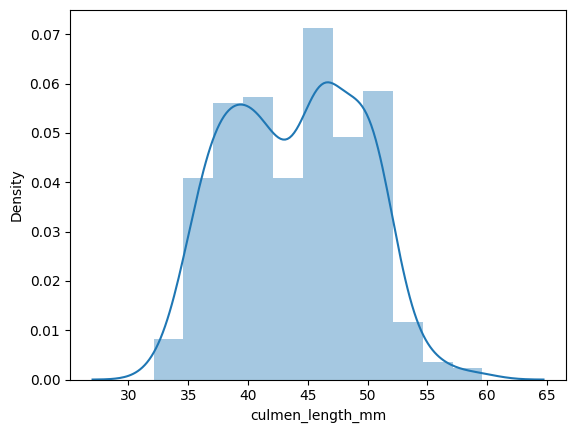

In [84]:
sns.distplot(df["culmen_length_mm"])

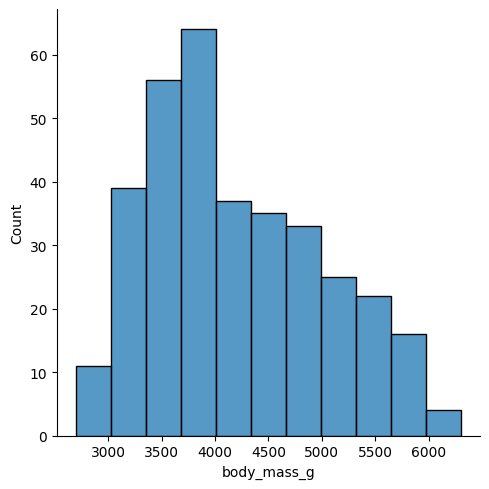

In [85]:
sns.displot(df["body_mass_g"])

In [86]:
df["species"].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [87]:
df["species"].value_counts()

Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

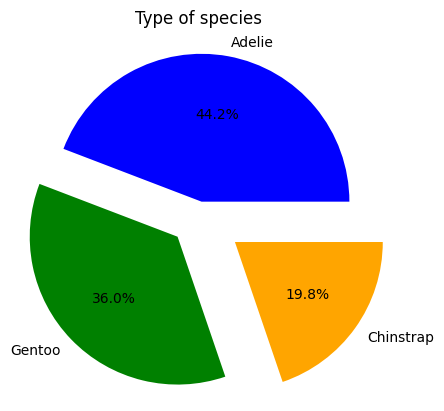

In [88]:
plt.pie(df["species"].value_counts(),[0.1,0.2,0.3],labels=['Adelie','Gentoo','Chinstrap'],autopct ='%1.1f%%',colors = ['blue','green','orange'],)
plt.title('Type of species')
plt.show()

<Axes: ylabel='species'>

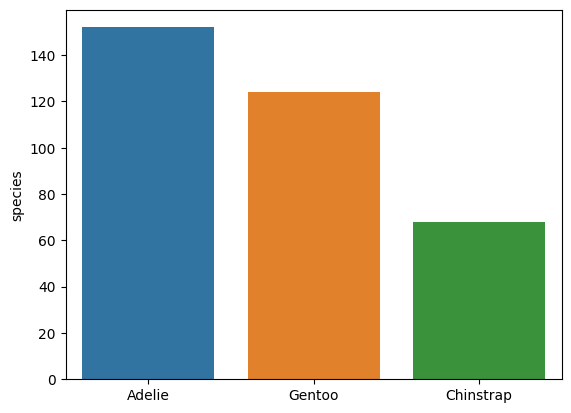

In [89]:
sns.barplot(x =df["species"].value_counts().index,y =df["species"].value_counts() )

###3.2 Bivariate Analysis

<Axes: xlabel='culmen_length_mm', ylabel='body_mass_g'>

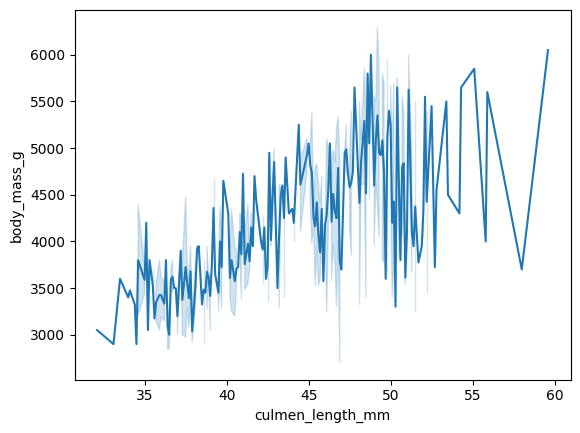

In [90]:
sns.lineplot(x = df["culmen_length_mm"],y=df["body_mass_g"])

<Axes: xlabel='culmen_depth_mm', ylabel='body_mass_g'>

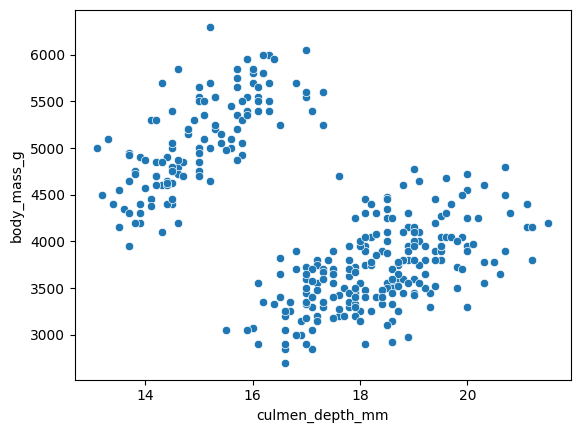

In [91]:
sns.scatterplot(x=df["culmen_depth_mm"],y=df["body_mass_g"])

###3.3 Multivariate Analysis

<Figure size 400x400 with 0 Axes>

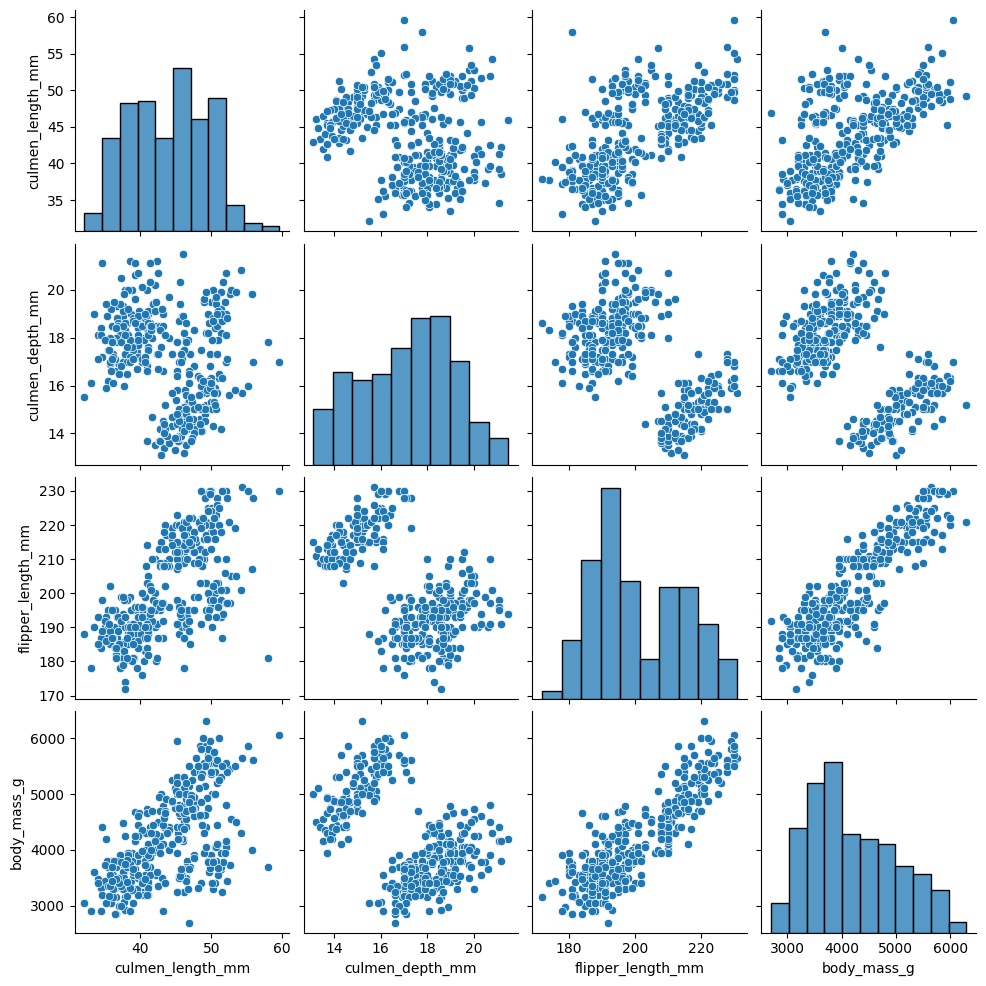

In [92]:
plt.figure(figsize=(4,4))
sns.pairplot(df)

<ipython-input-93-6aab38f112ea>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

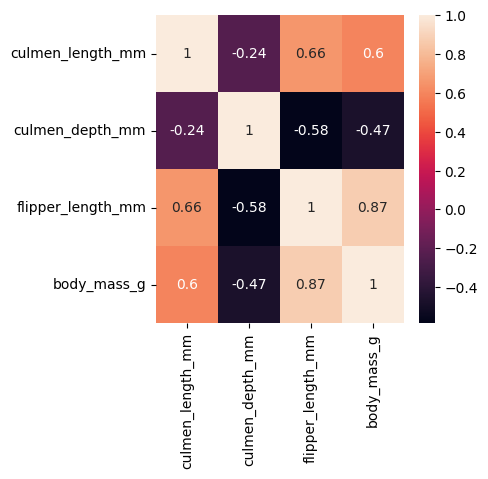

In [93]:
plt.figure(figsize=(4,4))
sns.heatmap(df.corr(),annot=True)

###4. descriptive statistics

In [94]:
##descriptive statistics
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


##5. Handling Missing Values

In [95]:
##checking missing values
df.isnull().any()

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [96]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [97]:
#handling null values of numerical parameters using median()
df["culmen_length_mm"].fillna(df["culmen_length_mm"].median(),inplace=True)
df["culmen_depth_mm"].fillna(df["culmen_depth_mm"].median(),inplace=True)
df["flipper_length_mm"].fillna(df["flipper_length_mm"].median(),inplace=True)
df["body_mass_g"].fillna(df["body_mass_g"].median(),inplace=True)

In [98]:
#handling null values of categorical parameters using mode()
df["sex"].mode()

0    MALE
Name: sex, dtype: object

In [99]:
df["sex"].fillna("MALE",inplace=True)

In [100]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

###6. Outlier detection

In [101]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,MALE
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,FEMALE


<Axes: >

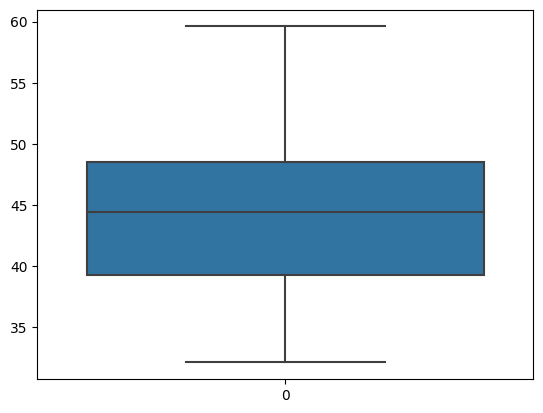

In [102]:
sns.boxplot(df["culmen_length_mm"])

<Axes: >

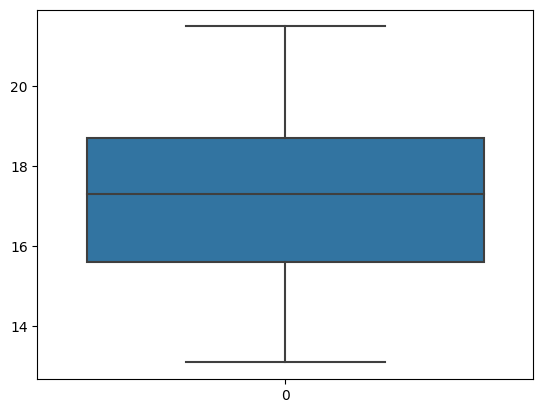

In [103]:
sns.boxplot(df["culmen_depth_mm"])

<Axes: >

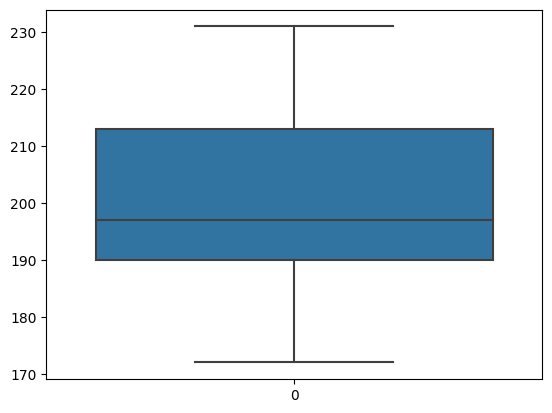

In [104]:
sns.boxplot(df["flipper_length_mm"])

<Axes: >

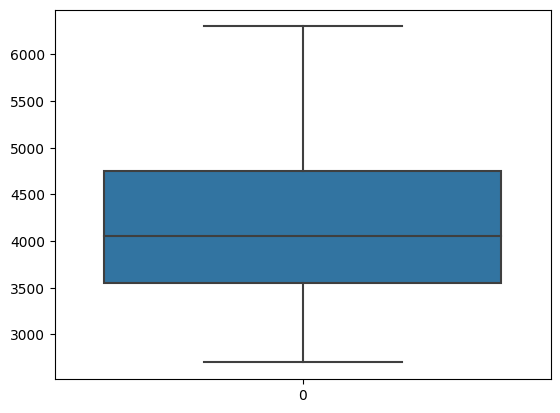

In [105]:
sns.boxplot(df["body_mass_g"])

In [106]:
## no outlier's has been detected in any of the patrameters of
##culmen_length_mm	culmen_depth_mm	flipper_length_mm	body_mass_g

###7. Indentifying Correlation

In [107]:
df.corr()

<ipython-input-107-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235000,0.655858,0.594925
culmen_depth_mm,-0.235000,1.000000,-0.583832,-0.471942
flipper_length_mm,0.655858,-0.583832,1.000000,0.871221
body_mass_g,0.594925,-0.471942,0.871221,1.000000


##8. Encoding

In [108]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,MALE
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,FEMALE


In [109]:
#perform encoding for the categorical columns i.e., species,island,sex
#label encoder is used to encode the categorical columns to convert into numerical values

In [110]:
#importing LabelEncoder from sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [111]:
df["species"]=le.fit_transform(df['species'])
df["island"]=le.fit_transform(df['island'])
df["sex"]=le.fit_transform(df['sex'])

In [112]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10,18.7,181.0,3750.0,2
1,0,2,39.50,17.4,186.0,3800.0,1
2,0,2,40.30,18.0,195.0,3250.0,1
3,0,2,44.45,17.3,197.0,4050.0,2
4,0,2,36.70,19.3,193.0,3450.0,1


###9. X&Y Split

In [113]:
X=df.drop(columns=["body_mass_g"],axis=1)
X.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,sex
0,0,2,39.10,18.7,181.0,2
1,0,2,39.50,17.4,186.0,1
2,0,2,40.30,18.0,195.0,1
3,0,2,44.45,17.3,197.0,2
4,0,2,36.70,19.3,193.0,1


In [114]:
Y=df["body_mass_g"]
Y.head()

0    3750.0
1    3800.0
2    3250.0
3    4050.0
4    3450.0
Name: body_mass_g, dtype: float64

###10. Scaling the data

In [115]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()

In [116]:
X_scaled=pd.DataFrame(scale.fit_transform(X),columns=X.columns)

In [117]:
X_scaled.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,sex
0,0.0,1.0,0.254545,0.666667,0.152542,1.0
1,0.0,1.0,0.269091,0.511905,0.237288,0.5
2,0.0,1.0,0.298182,0.583333,0.389831,0.5
3,0.0,1.0,0.449091,0.500000,0.423729,1.0
4,0.0,1.0,0.167273,0.738095,0.355932,0.5


###11. Spliting Training & Testing Data

In [118]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=0)

###12. Checking Training & Testing data shape

In [119]:
x_train.shape

(275, 6)

In [120]:
y_train.shape

(275,)

In [121]:
x_test.shape

(69, 6)

In [122]:
y_test.shape

(69,)